SalaryData

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV 

In [2]:
train = pd.read_csv('SalaryData_Train.csv')
train.head() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,<=50K


In [3]:
test = pd.read_csv('SalaryData_Test.csv')
test.head() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            9324 non-null   int64  
 1   workclass      9324 non-null   object 
 2   education      9324 non-null   object 
 3   educationno    9324 non-null   int64  
 4   maritalstatus  9324 non-null   object 
 5   occupation     9324 non-null   object 
 6   relationship   9324 non-null   object 
 7   race           9324 non-null   object 
 8   sex            9324 non-null   object 
 9   capitalgain    9324 non-null   int64  
 10  capitalloss    9323 non-null   float64
 11  hoursperweek   9323 non-null   float64
 12  native         9323 non-null   object 
 13  Salary         9323 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 1019.9+ KB


In [5]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,9324.000000,9324.000000,9324.000000,9323.000000,9323.000000
mean,38.332475,10.114329,1088.631810,88.521935,41.078086
std,13.095518,2.529587,7428.219122,401.278147,11.886365
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2824.000000,99.000000


In [6]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [7]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [8]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
lb = LabelEncoder()
train["workclass"] = lb.fit_transform(train["workclass"])
train["education"] = lb.fit_transform(train["education"])
train["maritalstatus"] = lb.fit_transform(train["maritalstatus"])
train["occupation"] = lb.fit_transform(train["occupation"])
train["relationship"] = lb.fit_transform(train["relationship"])
train["race"] = lb.fit_transform(train["race"])
train["sex"] = lb.fit_transform(train["sex"])
train["native"] = lb.fit_transform(train["native"])
train["Salary"] = lb.fit_transform(train["Salary"])

In [10]:
test["workclass"] = lb.fit_transform(test["workclass"])
test["education"] = lb.fit_transform(test["education"])
test["maritalstatus"] = lb.fit_transform(test["maritalstatus"])
test["occupation"] = lb.fit_transform(test["occupation"])
test["relationship"] = lb.fit_transform(test["relationship"])
test["race"] = lb.fit_transform(test["race"])
test["sex"] = lb.fit_transform(test["sex"])
test["native"] = lb.fit_transform(test["native"])
test["Salary"] = lb.fit_transform(test["Salary"])

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


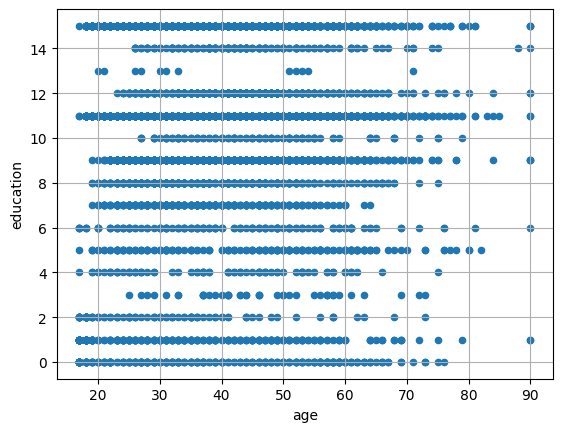

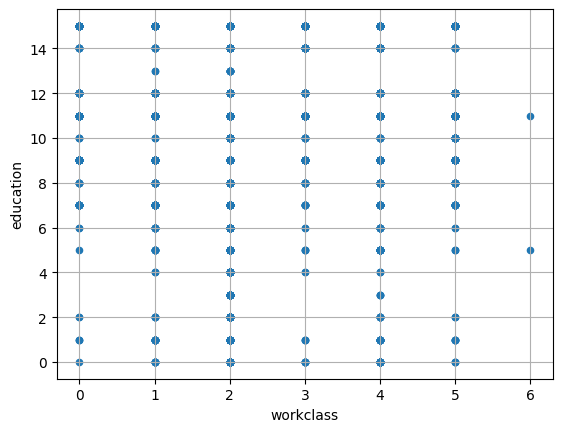

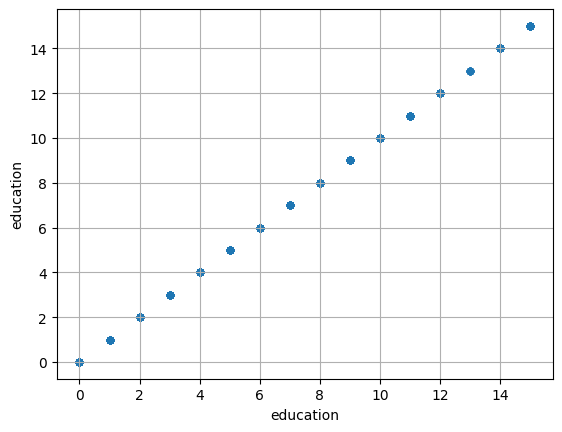

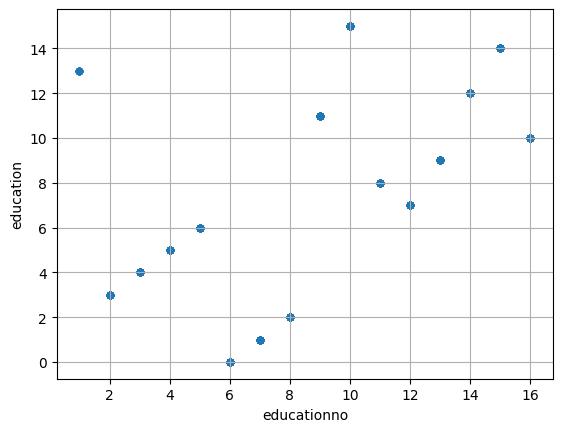

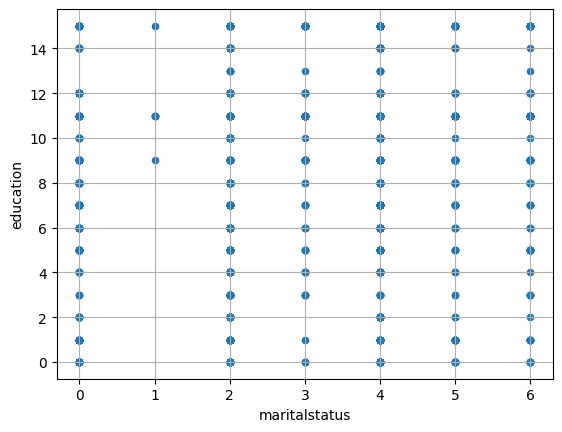

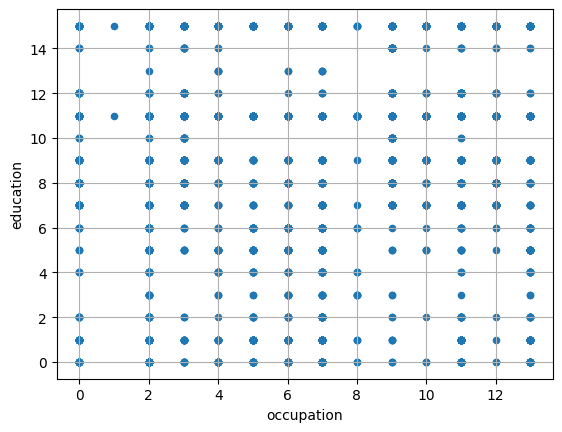

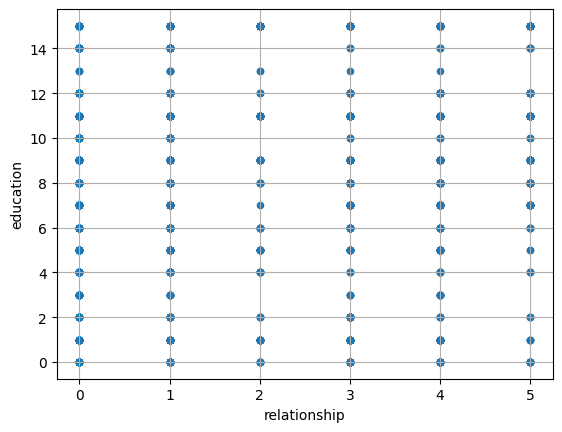

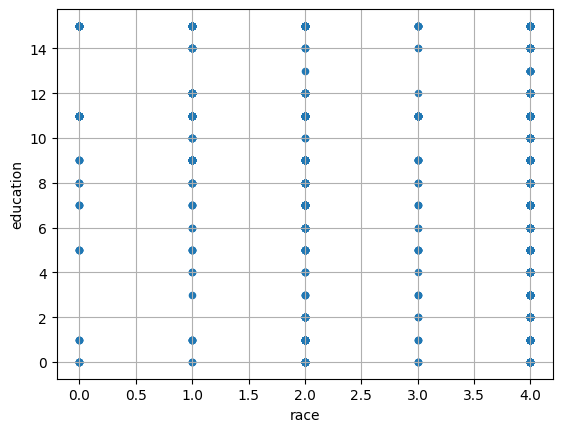

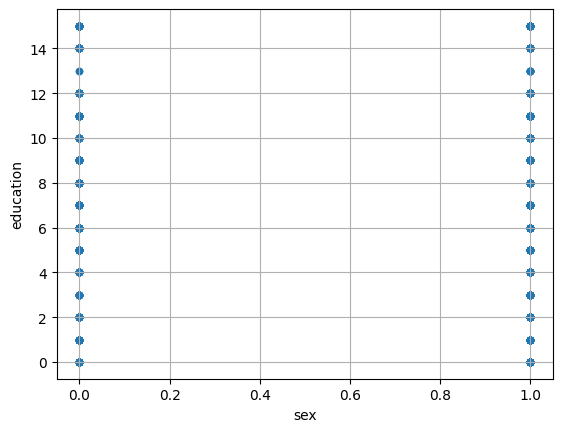

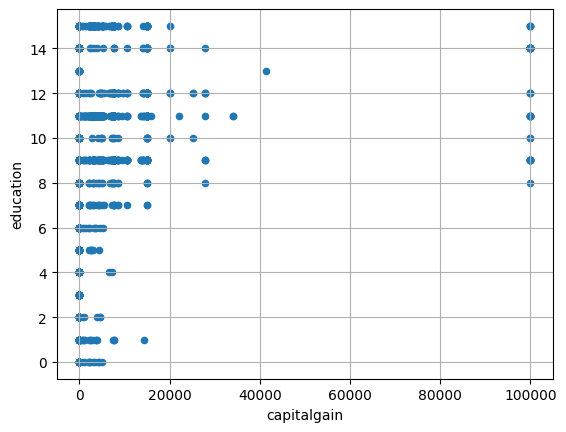

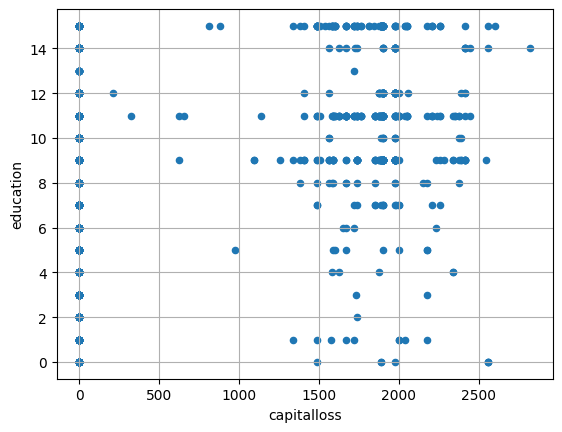

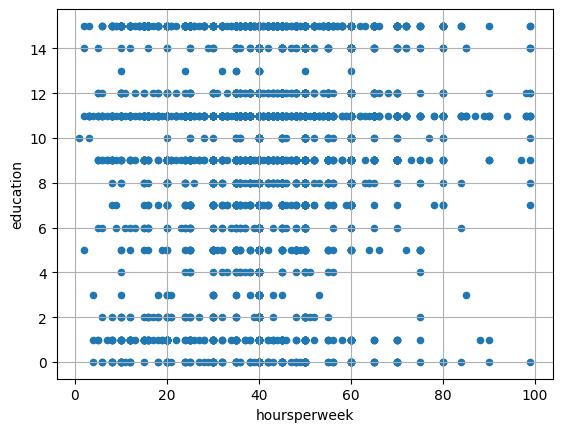

In [11]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'education',grid=True) 

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


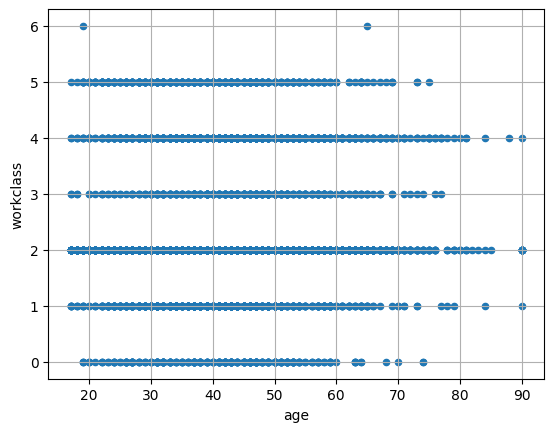

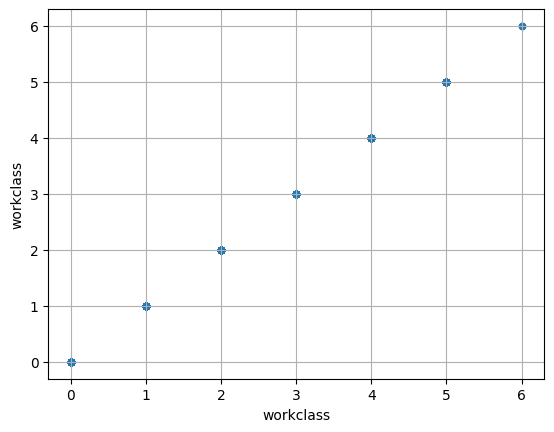

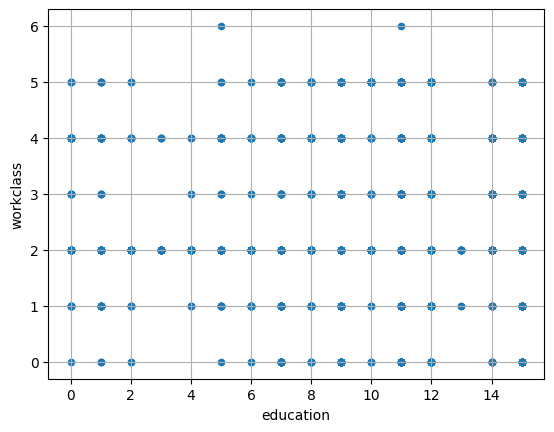

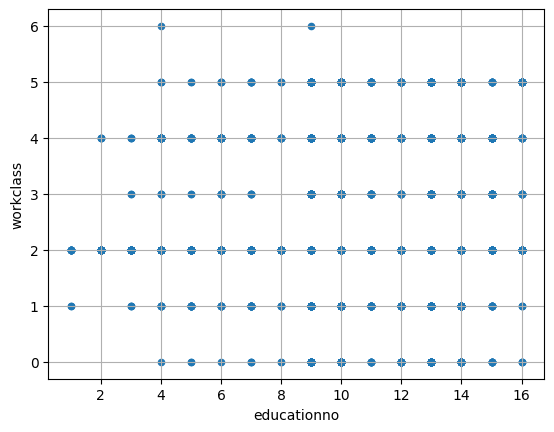

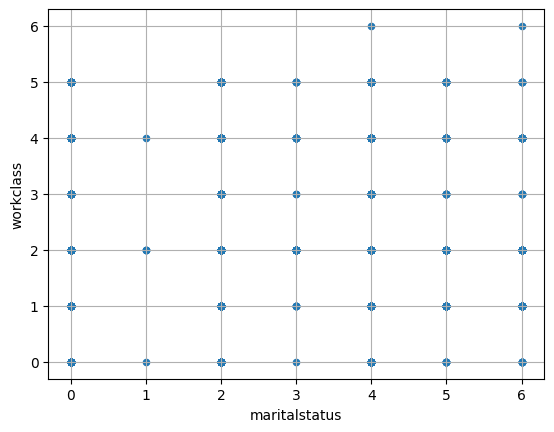

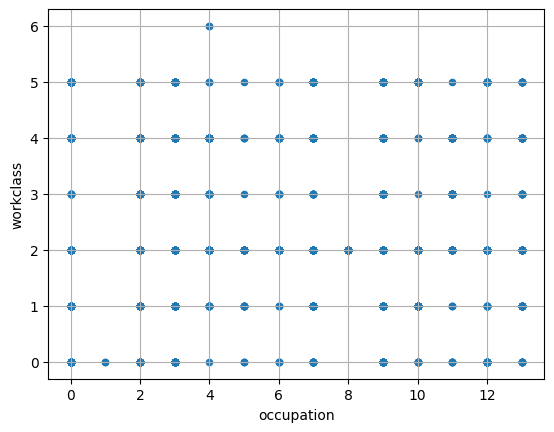

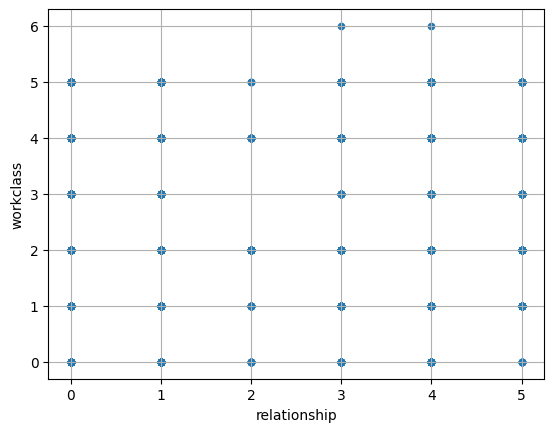

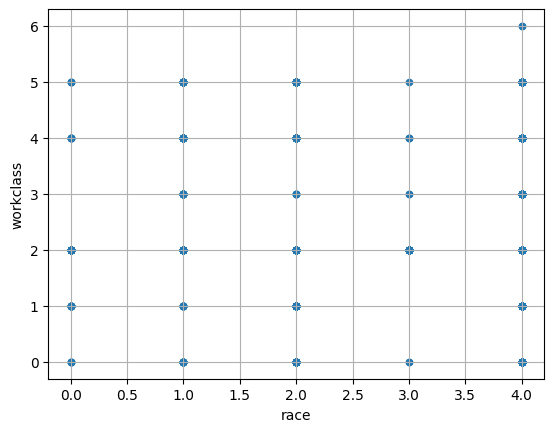

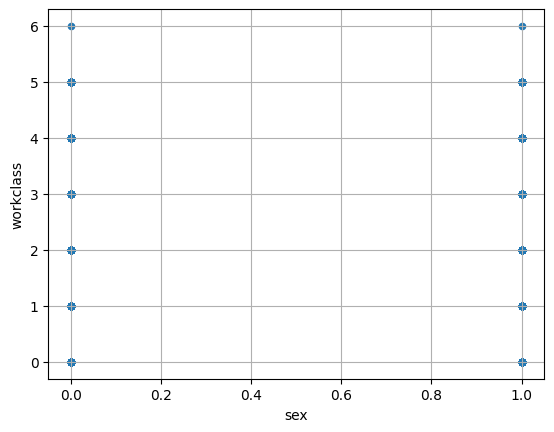

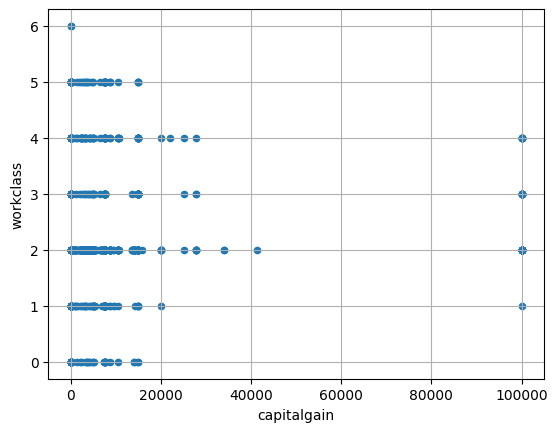

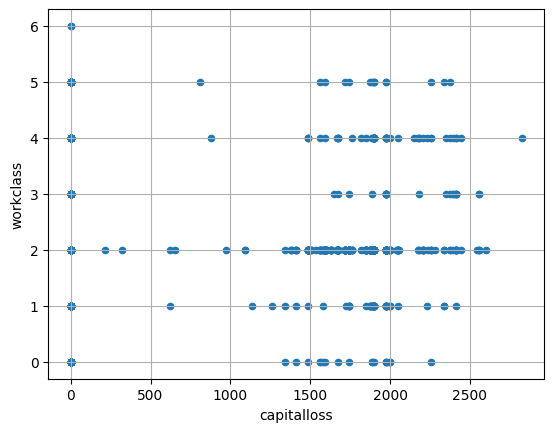

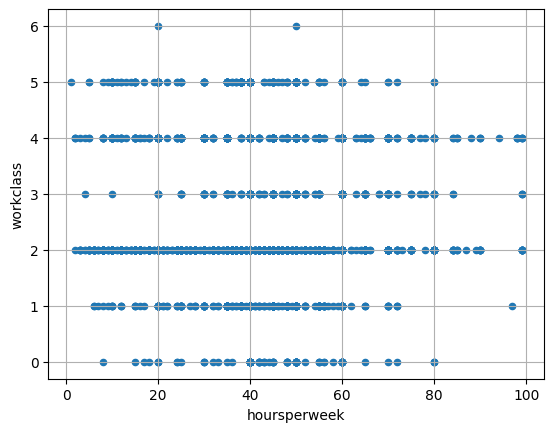

In [12]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'workclass',grid=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


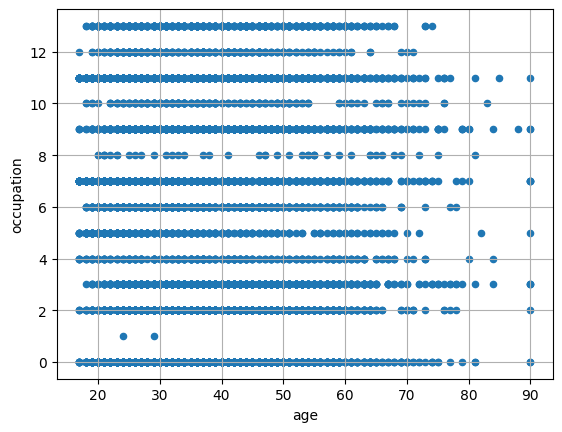

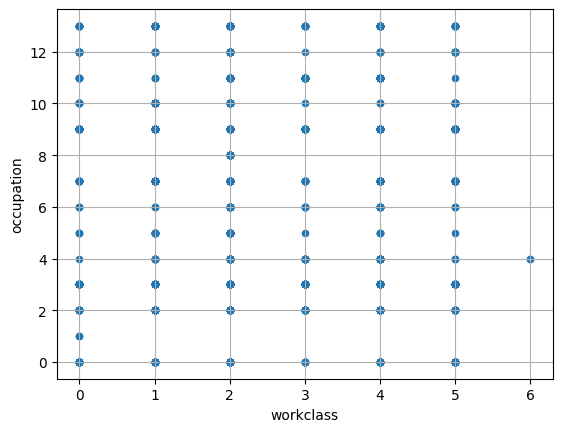

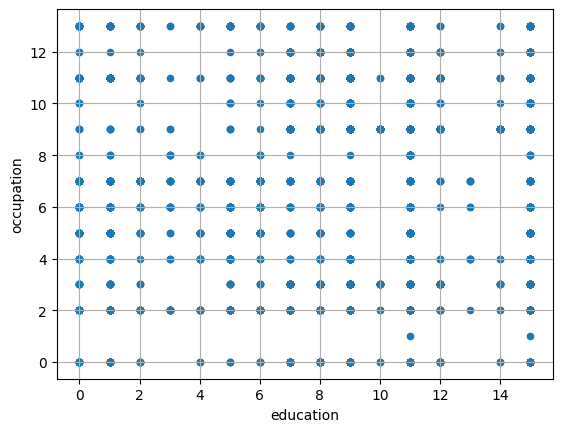

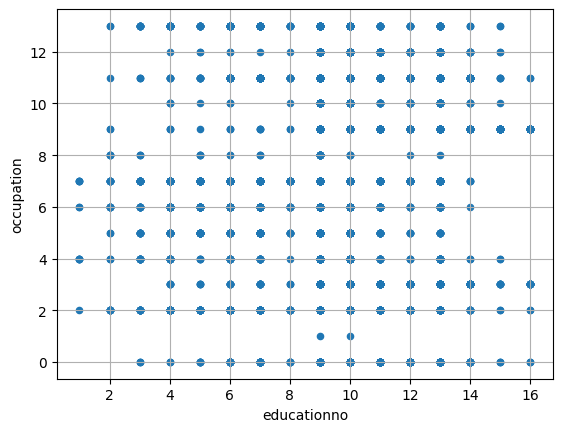

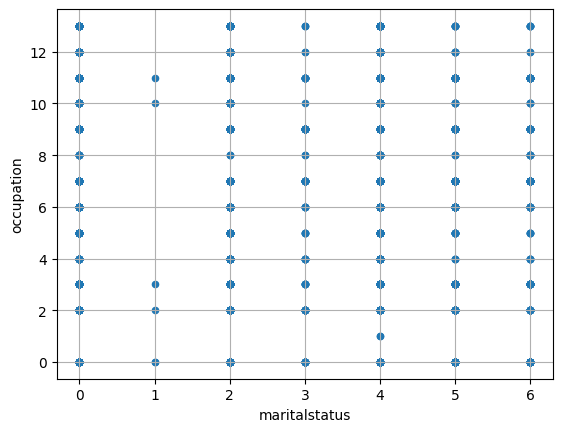

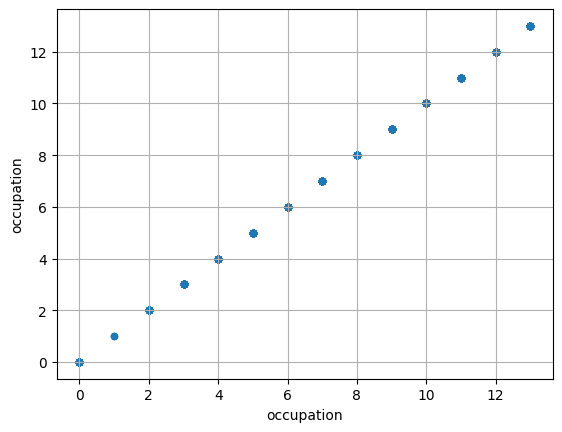

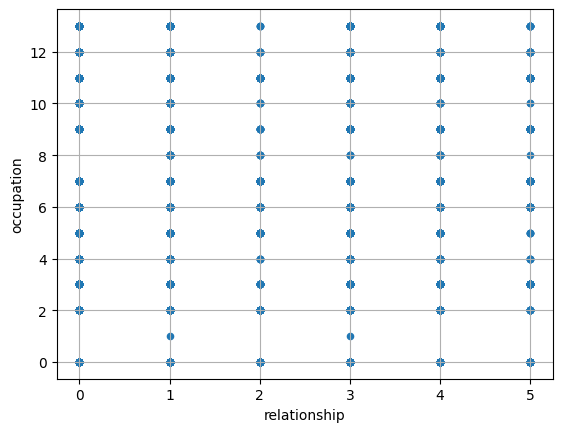

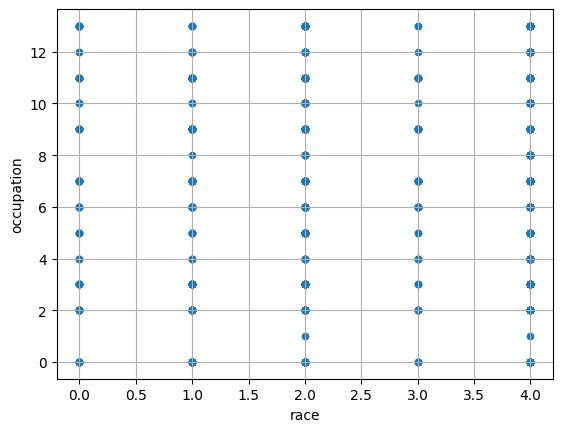

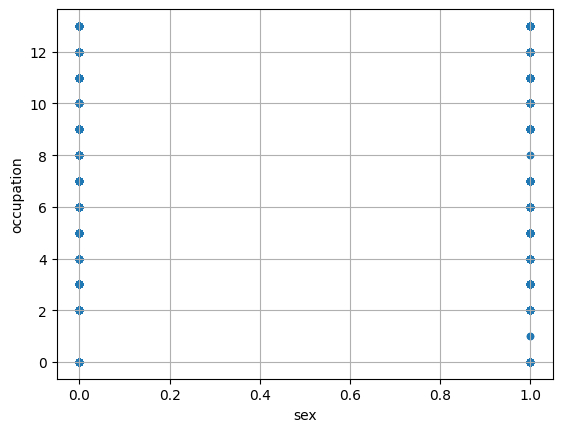

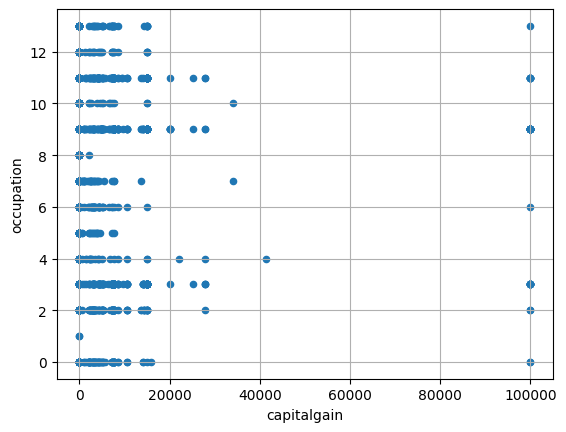

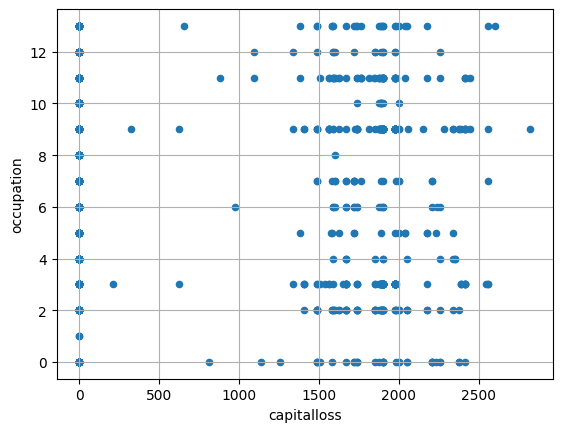

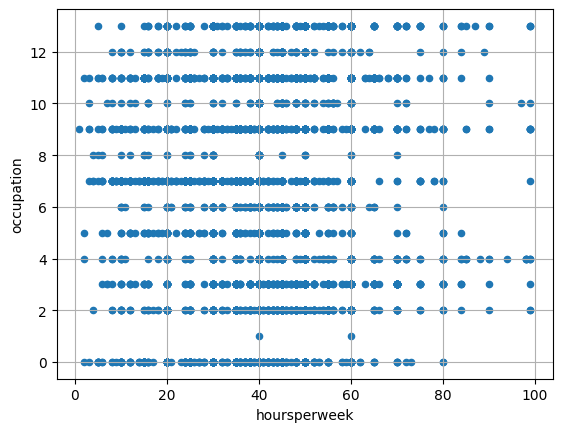

In [13]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'occupation',grid=True)

In [14]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.084520,-0.014222,0.034379,-0.268677,-0.010490,-0.233637,0.018799,0.068032,0.066750,0.060411,0.103067,-0.010675,0.233325
workclass,0.084520,1.000000,0.017609,0.045850,-0.027911,0.008765,-0.080163,0.040449,0.081582,0.033107,0.000475,0.044526,-0.004135,0.029849
education,-0.014222,0.017609,1.000000,0.347316,-0.018839,-0.035580,-0.006427,0.013392,-0.031200,0.038138,0.016822,0.036874,0.078486,0.068628
educationno,0.034379,0.045850,0.347316,1.000000,-0.042289,0.090586,-0.091119,0.036650,0.007114,0.124269,0.079110,0.140863,0.081535,0.327575
maritalstatus,-0.268677,-0.027911,-0.018839,-0.042289,1.000000,0.018991,0.162249,-0.076432,-0.107384,-0.050900,-0.029850,-0.189663,-0.016735,-0.189133
occupation,-0.010490,0.008765,-0.035580,0.090586,0.018991,1.000000,-0.063785,0.005799,0.080878,0.029790,0.009709,0.031452,-0.008626,0.061558
relationship,-0.233637,-0.080163,-0.006427,-0.091119,0.162249,-0.063785,1.000000,-0.112103,-0.574071,-0.053319,-0.060564,-0.266490,-0.010663,-0.238307
race,0.018799,0.040449,0.013392,0.036650,-0.076432,0.005799,-0.112103,1.000000,0.088545,0.017542,0.026418,0.050517,0.119218,0.083318
sex,0.068032,0.081582,-0.031200,0.007114,-0.107384,0.080878,-0.574071,0.088545,1.000000,0.046830,0.061735,0.220881,0.000728,0.201870
capitalgain,0.066750,0.033107,0.038138,0.124269,-0.050900,0.029790,-0.053319,0.017542,0.046830,1.000000,-0.032335,0.076719,0.004778,0.219962


In [15]:
test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.096037,-0.007948,0.026123,-0.262577,-0.002214,-0.249701,0.024485,0.082265,0.078760,0.057745,0.102758,-0.005683,0.227469
workclass,0.096037,1.000000,0.018005,0.046623,-0.031329,0.021271,-0.060235,0.059749,0.059161,0.032980,0.010242,0.052614,-0.003635,0.011008
education,-0.007948,0.018005,1.000000,0.351486,-0.043117,-0.023999,-0.014227,0.012133,-0.026978,0.028626,0.020568,0.062892,0.077065,0.085554
educationno,0.026123,0.046623,0.351486,1.000000,-0.068079,0.093643,-0.081413,0.029355,-0.002052,0.131750,0.085817,0.133691,0.097188,0.327813
maritalstatus,-0.262577,-0.031329,-0.043117,-0.068079,1.000000,0.003854,0.185495,-0.073718,-0.120374,-0.042405,-0.034073,-0.171665,-0.016532,-0.191058
occupation,-0.002214,0.021271,-0.023999,0.093643,0.003854,1.000000,-0.047381,-0.001561,0.045244,0.014165,0.016580,0.011755,-0.001311,0.046218
relationship,-0.249701,-0.060235,-0.014227,-0.081413,0.185495,-0.047381,1.000000,-0.121481,-0.579212,-0.054040,-0.048091,-0.261905,0.000500,-0.258335
race,0.024485,0.059749,0.012133,0.029355,-0.073718,-0.001561,-0.121481,1.000000,0.088450,0.013539,0.015799,0.037125,0.125514,0.069227
sex,0.082265,0.059161,-0.026978,-0.002052,-0.120374,0.045244,-0.579212,0.088450,1.000000,0.044843,0.045360,0.231744,-0.014178,0.213863
capitalgain,0.078760,0.032980,0.028626,0.131750,-0.042405,0.014165,-0.054040,0.013539,0.044843,1.000000,-0.031876,0.090501,0.005923,0.220882


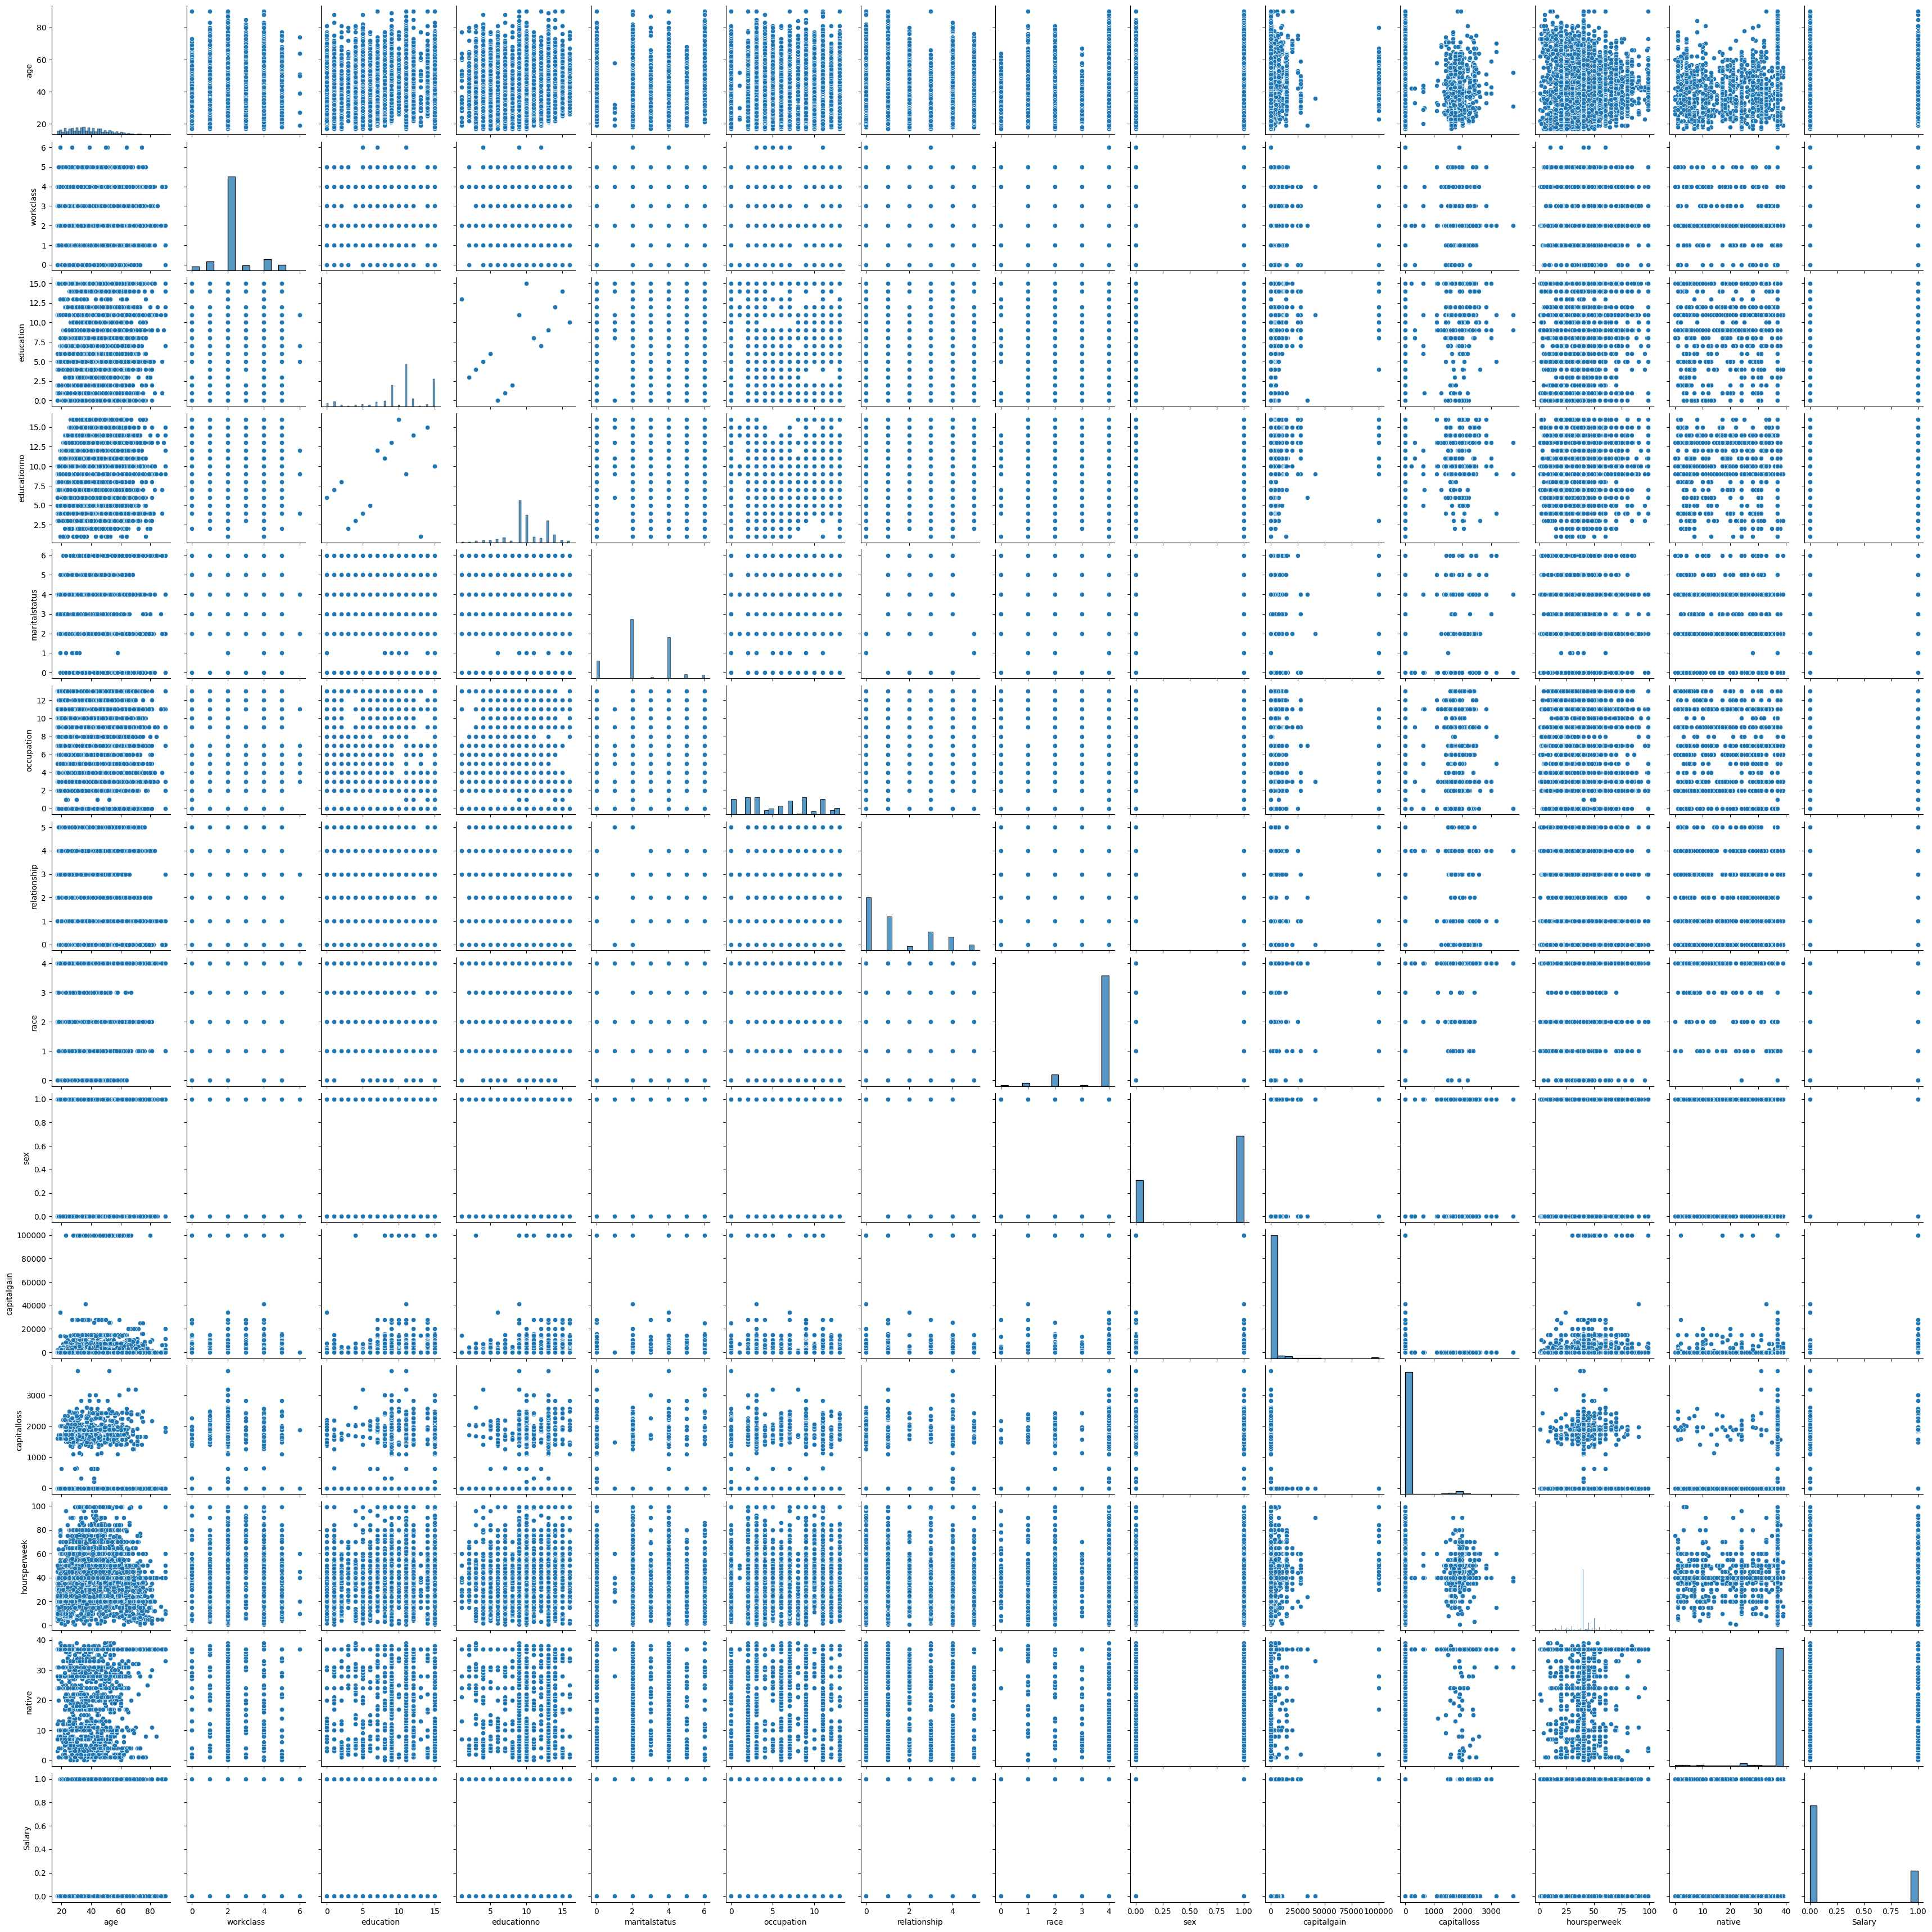

In [16]:
sns.pairplot(test) 

In [17]:
train = train.iloc[: 2000, :]
test = test.iloc[: 1300, :] 

In [18]:
x_train=train.iloc[:,:-1]
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0.0,40.0,37
1,50,4,9,13,2,3,0,4,1,0,0.0,13.0,37
2,38,2,11,9,0,5,1,4,1,0,0.0,40.0,37
3,53,2,1,7,2,5,0,2,1,0,0.0,40.0,37
4,28,2,9,13,2,9,5,2,0,0,0.0,40.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,33,2,11,9,5,10,3,4,0,0,0.0,40.0,37
1996,41,2,11,9,2,6,0,4,1,0,0.0,40.0,37
1997,51,2,6,5,2,13,0,4,1,0,0.0,40.0,37
1998,42,2,11,9,2,11,0,4,1,0,0.0,48.0,37


In [19]:
y_train=train.iloc[:,-1]
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    1
Name: Salary, Length: 2000, dtype: int64

In [20]:
x_test=test.iloc[:,:-1]
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,66,4,15,10,2,13,0,2,1,0,0,60,37
1296,40,2,15,10,4,2,2,0,1,0,0,30,37
1297,37,2,4,3,2,6,0,4,1,0,0,40,7
1298,34,2,9,13,2,11,0,4,1,0,0,40,37


In [21]:
y_test = test.iloc[:,-1]
y_test

0       0
1       0
2       1
3       1
4       0
       ..
1295    0
1296    0
1297    0
1298    0
1299    0
Name: Salary, Length: 1300, dtype: int64

In [22]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2000, 13), (2000,), (1300, 13), (1300,))

In [23]:
#svm model
model = SVC()
model.fit(x_train, y_train)

SVC()

In [24]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
print(confusion_matrix(y_test, y_pred))

[[961   5]
 [267  67]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88       966
           1       0.93      0.20      0.33       334

    accuracy                           0.79      1300
   macro avg       0.86      0.60      0.60      1300
weighted avg       0.82      0.79      0.74      1300



In [27]:
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.752 total time=   0.3s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.750 total time=   0.3s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.3s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.2s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.743 total time=   0.2s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.2s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.2s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.2s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.2s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.2s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.775 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [28]:
grid.best_params_

{'C': 15, 'gamma': 0.001, 'kernel': 'rbf'}

In [29]:
grid_pred = grid.predict(x_test)
grid_pred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
print(confusion_matrix(y_test, grid_pred))

[[938  28]
 [198 136]]


In [31]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       966
           1       0.83      0.41      0.55       334

    accuracy                           0.83      1300
   macro avg       0.83      0.69      0.72      1300
weighted avg       0.83      0.83      0.80      1300



ForestFires

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [33]:
df = pd.read_csv('forestfires.csv')
df 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [34]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [36]:
df.corr() 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


<Axes: xlabel='month', ylabel='count'>

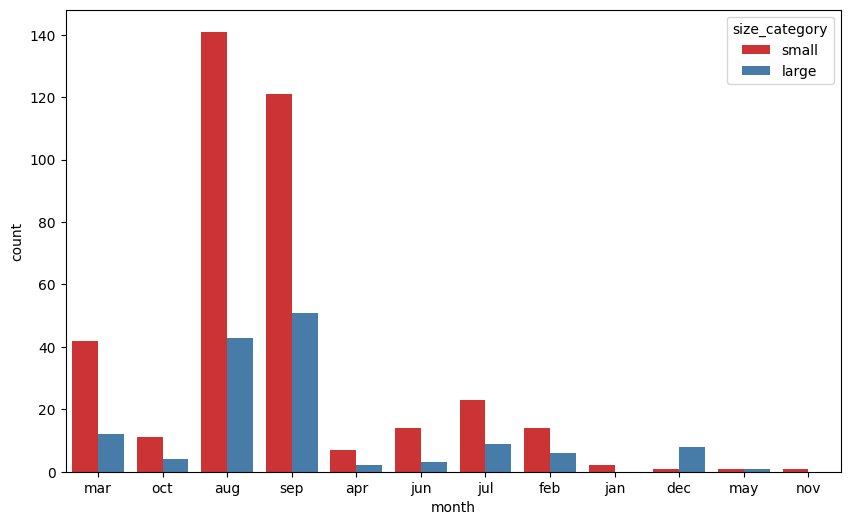

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'month', hue = 'size_category', data = df, palette='Set1')

<Axes: xlabel='day', ylabel='count'>

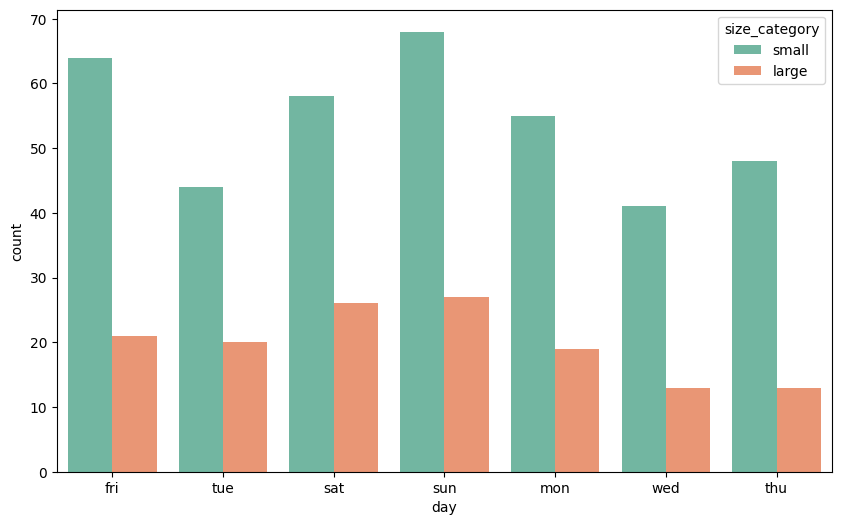

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'day', hue = 'size_category', data = df, palette='Set2')

In [39]:
label_encoder = preprocessing.LabelEncoder()
df["month"] = label_encoder.fit_transform(df["month"])
df["day"] = label_encoder.fit_transform(df["day"])
df["size_category"] = label_encoder.fit_transform(df["size_category"])

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


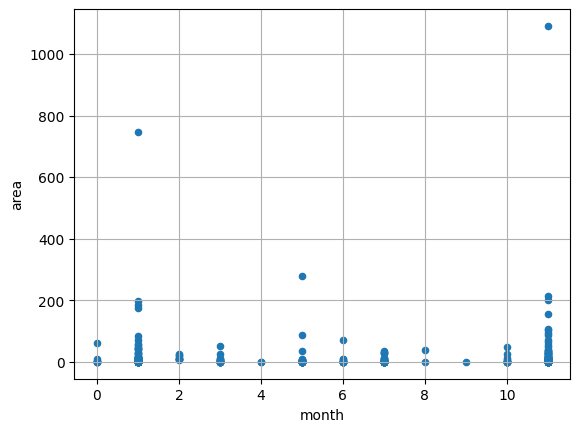

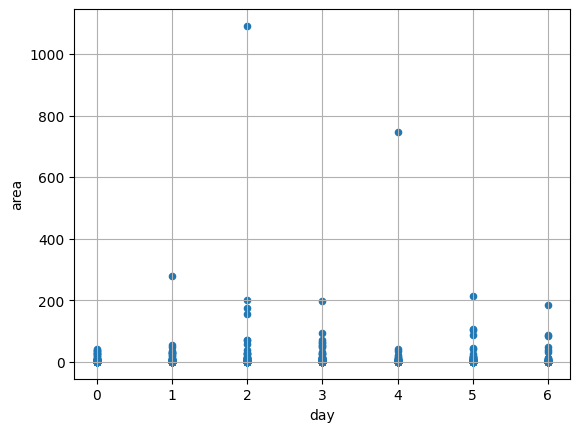

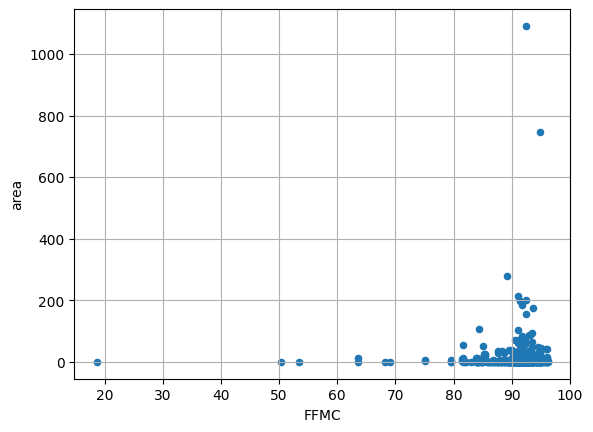

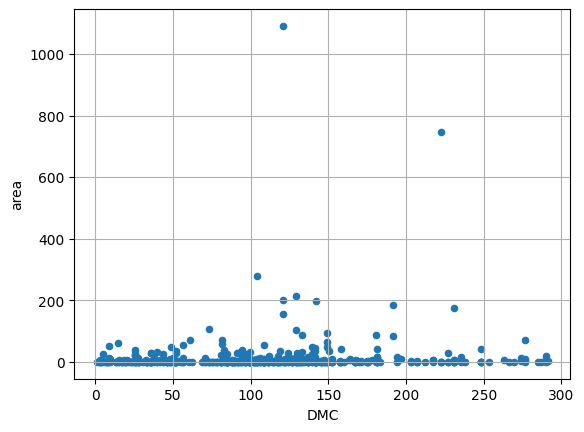

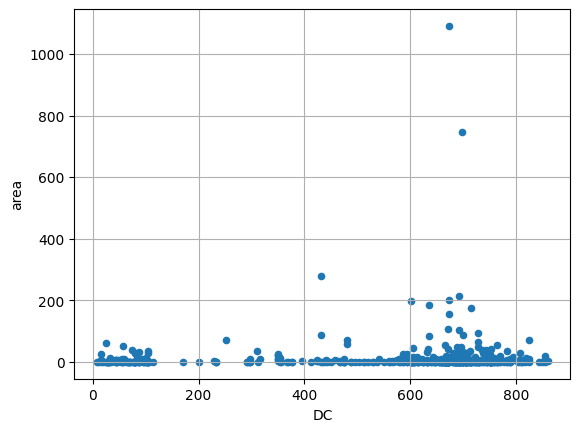

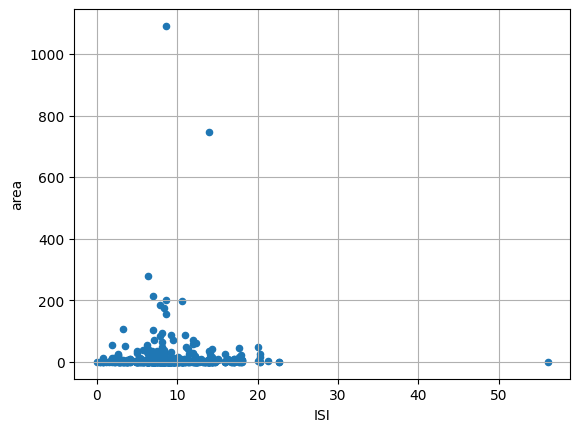

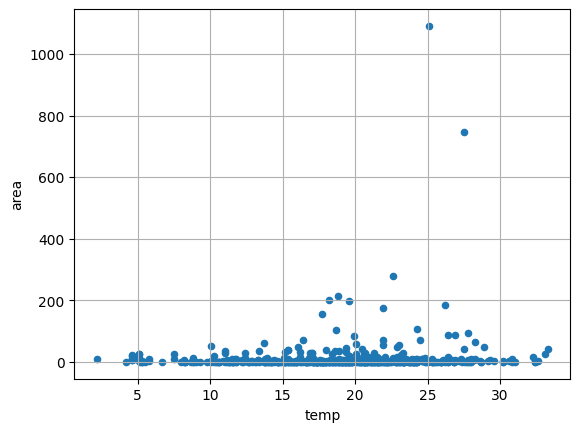

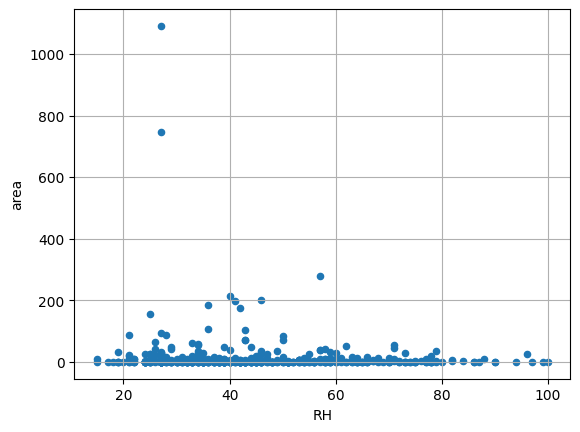

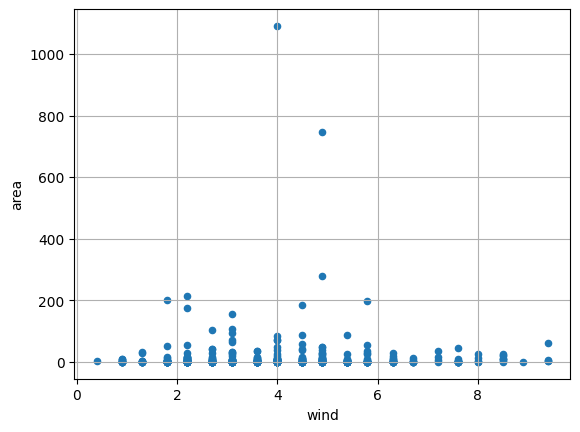

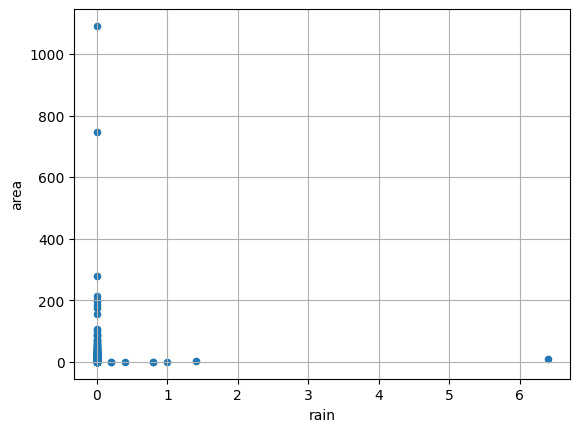

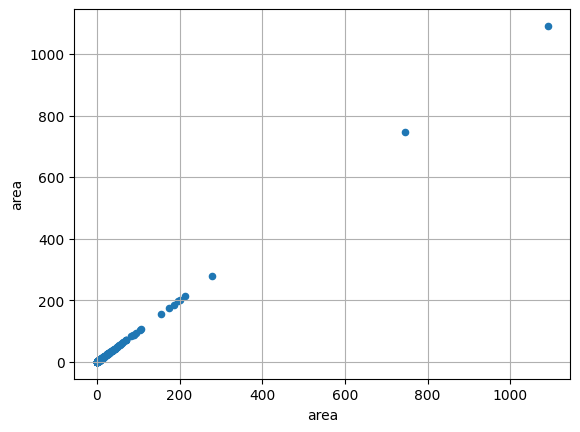

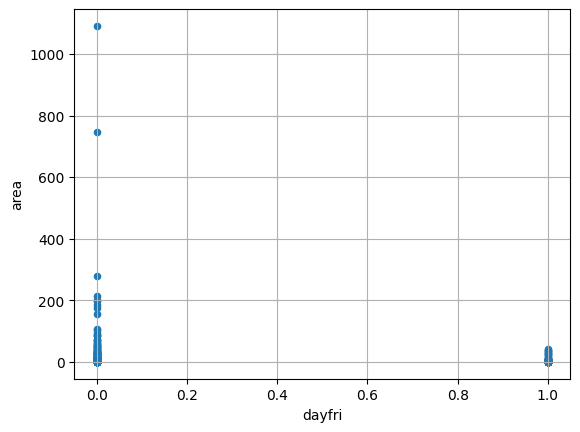

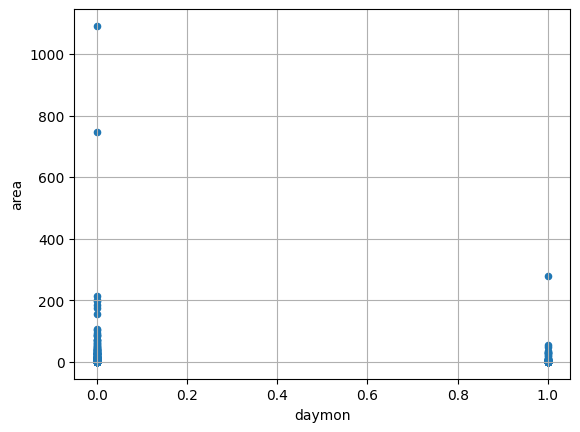

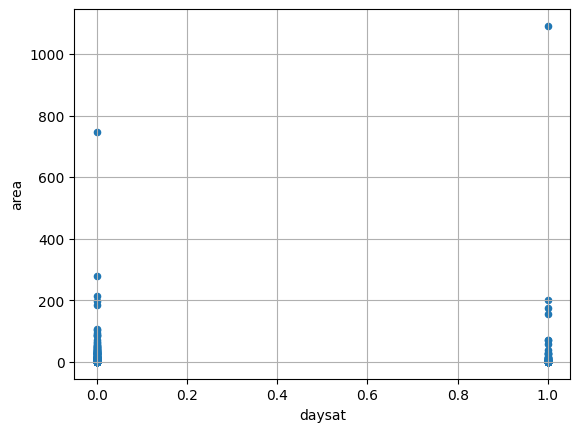

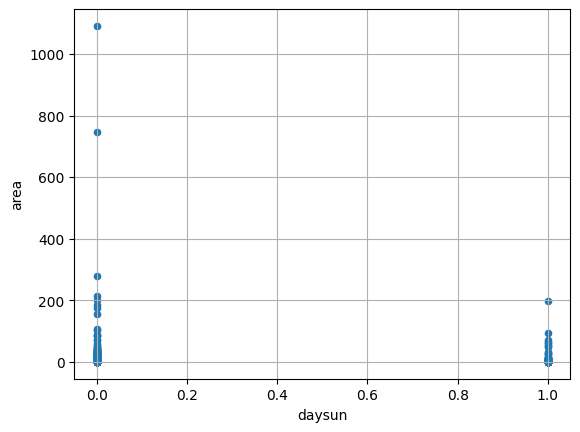

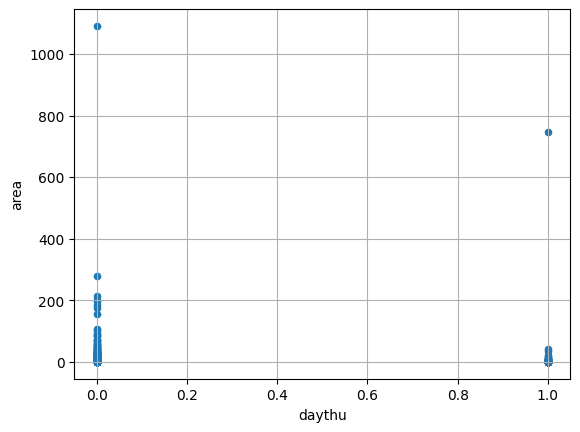

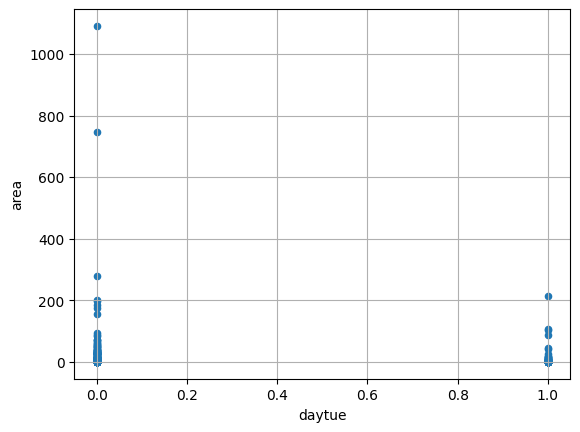

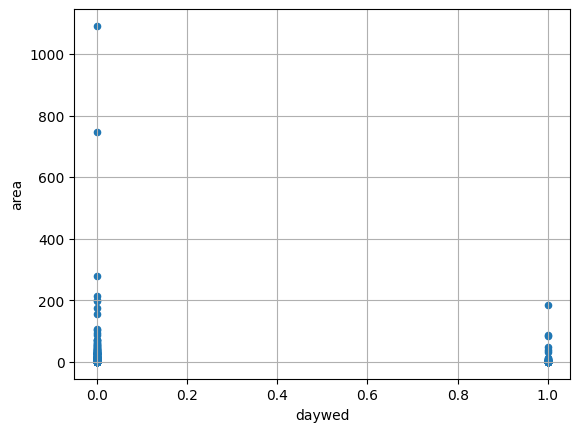

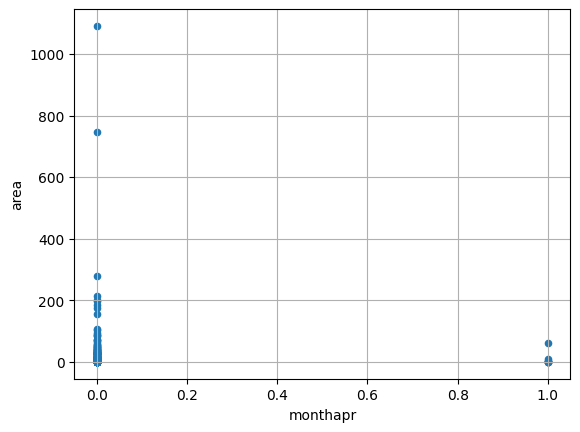

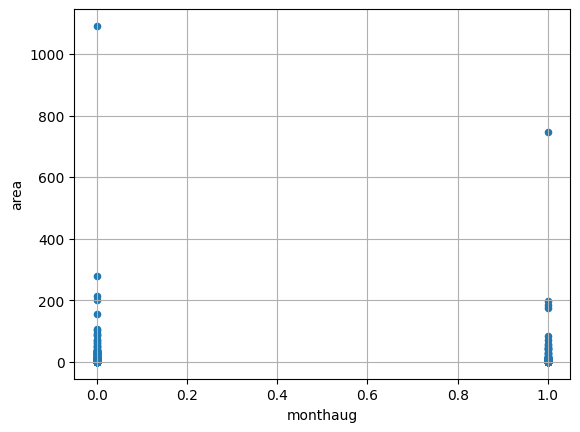

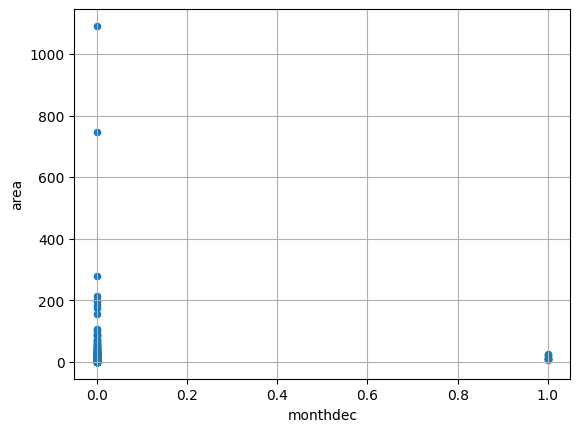

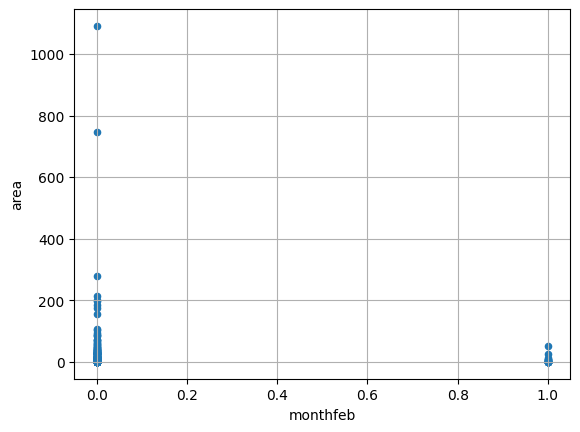

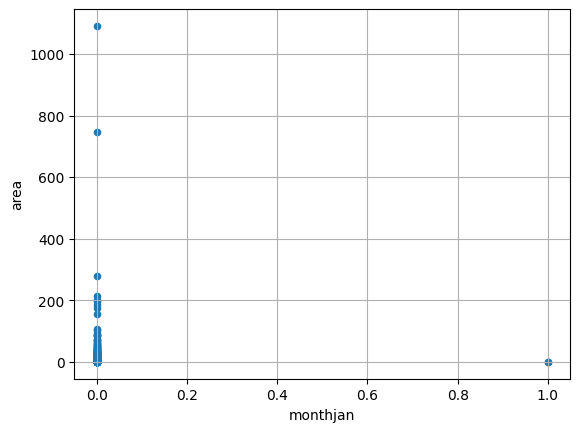

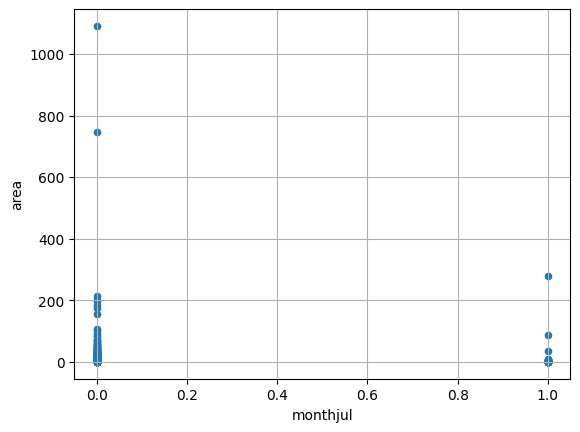

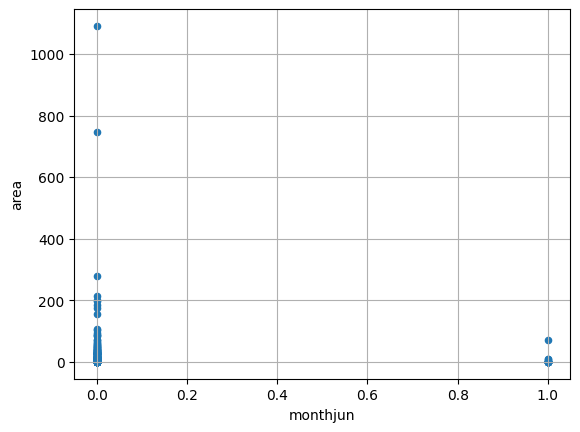

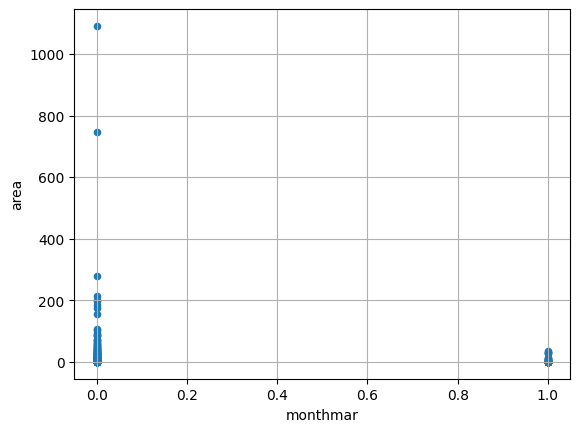

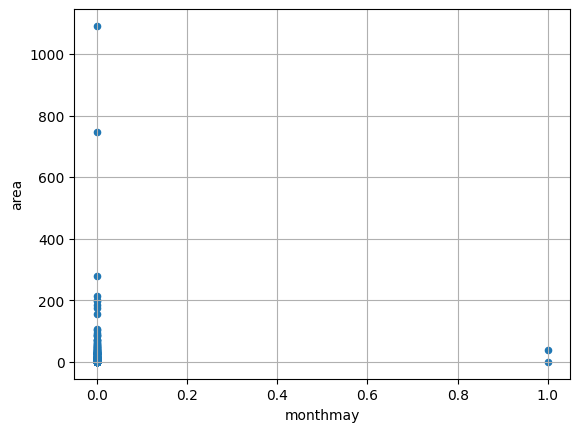

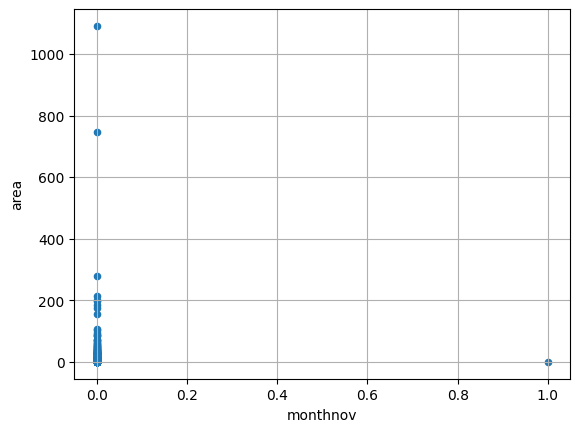

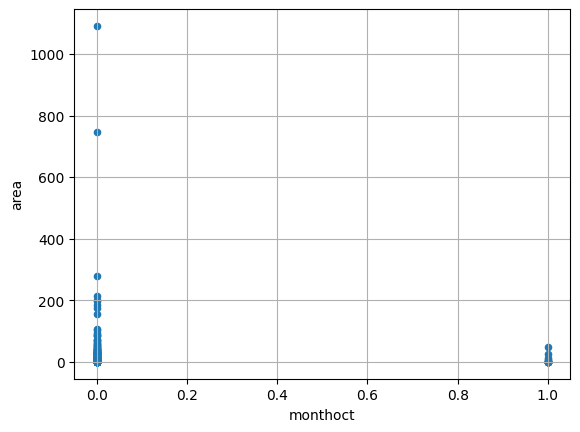

In [40]:
for i in df.describe().columns[:-2]:
    df.plot.scatter(i,'area',grid=True)

In [41]:
X = df.iloc[:,:11]
y=df["size_category"]
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [42]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((361, 11), (361,), (156, 11), (156,))

In [44]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [45]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [46]:
print(confusion_matrix(y_test, y_pred))

[[  2  43]
 [  0 111]]


In [47]:
# improving model using gridsearch cv
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [48]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [49]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [50]:
grid_pred = grid.predict(X_test)
grid_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

In [51]:
print(confusion_matrix(y_test, grid_pred))

[[ 39   6]
 [  4 107]]


In [52]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        45
           1       0.95      0.96      0.96       111

    accuracy                           0.94       156
   macro avg       0.93      0.92      0.92       156
weighted avg       0.94      0.94      0.94       156

